In [1]:
from maelzel.core import *

Chain([4C:1♩:gliss=True:symbols=[Hairpin(anchor=Hairpin, direction=>, kind=start, partnerSpanner=Hairpin, uuid=pmjx1lgt)], 4A+, Rest:1♩])
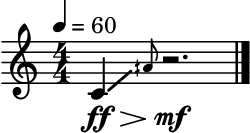

In [2]:
n = Note(60, dynamic='ff', gliss=True)
m = Note("4A+!", dur=0)
o = Rest(1, dynamic='mf')
ch = Chain([n, m, o])
ch.addSpanner('>')
ch

Chain([4C:1♩:symbols=[Hairpin(anchor=Hairpin, direction=<, kind=start, uuid=7c3cckpy)], 4D:0.5♩, 4E:1♩])
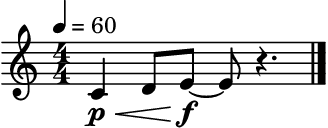

In [3]:
chain = Chain([
    Note("4C", 1, dynamic='p').addSpanner("<"),
    Note("4D", 0.5),
    Note("4E", dynamic='f')   # This ends the hairpin spanner
])
chain

Chain([4C:1.333♩:symbols=[Hairpin(anchor=Hairpin, direction=<, kind=start, uuid=76k54oqz)], 4D:0.5♩:symbols=[Slur(anchor=Slur, kind=start, linetype=solid, uuid=d7dgcy12)], 4E:1♩:symbols=[Slur(anchor=Slur, kind=end, linetype=solid, uuid=94nvy1z8)], 4F:0.5♩])
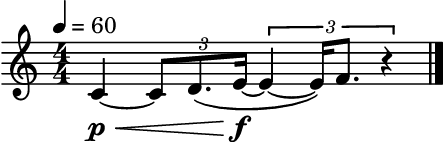

In [4]:
chain = Chain([
    Note("4C", 1+F(1, 3), dynamic='p').addSpanner("<"),
    Note("4D", 0.5).addSpanner("slur"),
    Note("4E", dynamic='f').addSpanner('~slur'),   # This ends the hairpin spanner
    Note("4F", 0.5),
])
chain

Chain([4C:1.333♩:symbols=[Hairpin(anchor=Hairpin, direction=<, kind=start, uuid=j64hyp9l)], 4D:0.5♩:symbols=[Slur(anchor=Slur, kind=start, linetype=solid, uuid=yvkwtpwp)], Rest:1♩, 4F:0.5♩:symbols=[Slur(anchor=Slur, kind=end, linetype=solid, uuid=04uv3weu)]])
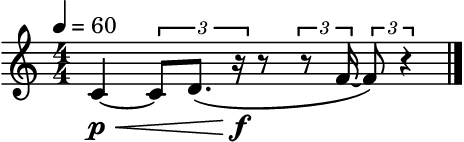

In [10]:
chain = Chain([
    Note("4C", 1+F(1, 3), dynamic='p').addSpanner("<"),
    Note("4D", 0.5).addSpanner("slur"),
    Rest(1, dynamic='f'),   # This ends the hairpin spanner
    Note("4F", 0.5).addSpanner('~slur'),
])
chain